# <span style="color:red"> * Libraries Import<span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import plotly.express as px
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression


# <span style="color:red"> * Read Data<span>

In [2]:
Data = pd.read_csv('stock_market_data.csv')
AMZN = Data[Data['Symbol'] == 'AMZN']
FB = Data[Data['Symbol'] == 'FB']
TSLA = Data[Data['Symbol'] == 'TSLA']
GOOGL = Data[Data['Symbol'] == 'GOOGL']
AAPL = Data[Data['Symbol'] == 'AAPL']

In [3]:
### USER DATABASE ###
user_shares = {}
curr_price = {}
latest_price = {}
second_to_latest = {}


# <span style="color:red"> * Shares settings<span>

In [4]:
tlist = [AMZN, FB, TSLA, GOOGL, AAPL]
tickers = ['AMZN', 'FB', 'TSLA', 'GOOGL', 'AAPL']
tp = {'AMZN' : list(AMZN['Open'])[-1], 'FB' : list(FB['Open'])[-1], 'TSLA' : list(TSLA['Open'])[-1], 'GOOGL': list(GOOGL['Open'])[-1], 'AAPL': list(AAPL['Open'])[-1]}

# <span style="color:red"> * Classes<span>

In [5]:
class User:

    def __init__(self, name, ID, BD, Balance):
        self.name = name
        self.ID = ID
        self.BD = BD
        self.Balance = Balance
        self.shares = {}

    def buy(self, ticker, curr_price):
        
        to_buy = int(input(f'{ticker} price is {curr_price[ticker]}$ per share, how many shares do you want to buy?'))

        if(to_buy * curr_price[ticker] > self.Balance):
            print("Insufficient Balance")

        else:
            self.Balance -= curr_price[ticker] * to_buy

            if ticker not in self.shares.keys():
                self.shares[ticker] = to_buy
            else:
                self.shares[ticker] += to_buy

            print(f'You have successfully bought {to_buy} share from {ticker}, your new Balance is: {self.Balance}$')

    def sell(self, ticker, latest_price):
            
        to_sell = int(input(f'{ticker} price is {latest_price[ticker]} per share and you have {self.shares[ticker]} shares, how many shares of yours do you want to sell?'))

        if ticker in self.shares.keys() and self.shares[ticker] != 0:   
            if(to_sell > int(self.shares[ticker])):
                print("Insufficient Shares!")

            else:
                self.Balance += latest_price[ticker] * to_sell
                self.shares[ticker] -= to_sell

                print(f'You have successfully sold {to_sell} shares of {ticker}, your new Balance is: {self.Balance}')
        
        else:
            print(f'You do not have any {ticker} shares in your portfolio!')


<h3> Welcome to NYSE Stock market, please sign up to continue: </h3>

<h6> please enter your first name and last name: </h6>

In [7]:
name = input()

<h6>please enter your ID number:</h6>

In [8]:
ID = input()

 123


<h6>please enter you birth date in this format(dd/mm/yyyy):</h6>

In [9]:
BD = input()

 123


<h6>please enter your balance in US$:</h6>

In [10]:
Balance = int(input())

 25000


<h6>New user:</h6>

In [14]:
user = User(name, ID, BD, Balance)

<h3>Thanks for your registration, now you have access to trade in Stock market</h3>


# <span style="color:red"> * Stock market portfolio<span>

## Prices settings:

In [12]:
for ticker in range(4):
    for i, j in enumerate(tlist[ticker]['Date']):
        if j == '2020-03-02':
            curr_price[tickers[ticker]] = list(tlist[ticker]['Open'])[i] 
            break

for i, j in enumerate(tickers):
    latest_price[j] = list(tlist[i]['Open'])[-1]
    second_to_latest[j] = list(tlist[i]['Open'])[-2]

## To buy shares:

In [17]:
print(f'Your Balance is : {Balance}$')
pick = int(input('''to buy shares, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
'''))

ticker = tickers[pick-1]     

user.buy(ticker, curr_price)
    
        

Your Balance is : 25000$


to buy shares, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
 1
AMZN price is 1906.489990234375$ per share, how many shares do you want to buy? 1


You have successfully bought 1 share from AMZN, your new Balance is: 22705.45001220703$


## To sell shares:

In [21]:
d = {'Ticker': list(user.shares.keys()), 'Quantity': list(user.shares.values())}
df2 = pd.DataFrame(data=d)
ins = list(df2['Quantity'])
df2 = df2.set_index('Quantity')

if 0 in ins:
    df2 = df2.drop(0)
df2 = df2.reset_index()

print(f'Your Shares are listed Below:')
if len(df2):
    print(df2.to_markdown())

pick = int(input('''to sell shares, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
'''))

if tickers[pick - 1] in user.shares.keys():
    ticker = tickers[pick - 1]
    user.sell(ticker, latest_price)
else:
    print("you do not have such a share to sell!")

Your Shares are listed Below:
|    |   Quantity | Ticker   |
|---:|-----------:|:---------|
|  0 |          2 | FB       |
|  1 |          1 | AMZN     |


to sell shares, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
 5


you do not have such a share to sell!


## To check charts:

To check the charts, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
 1


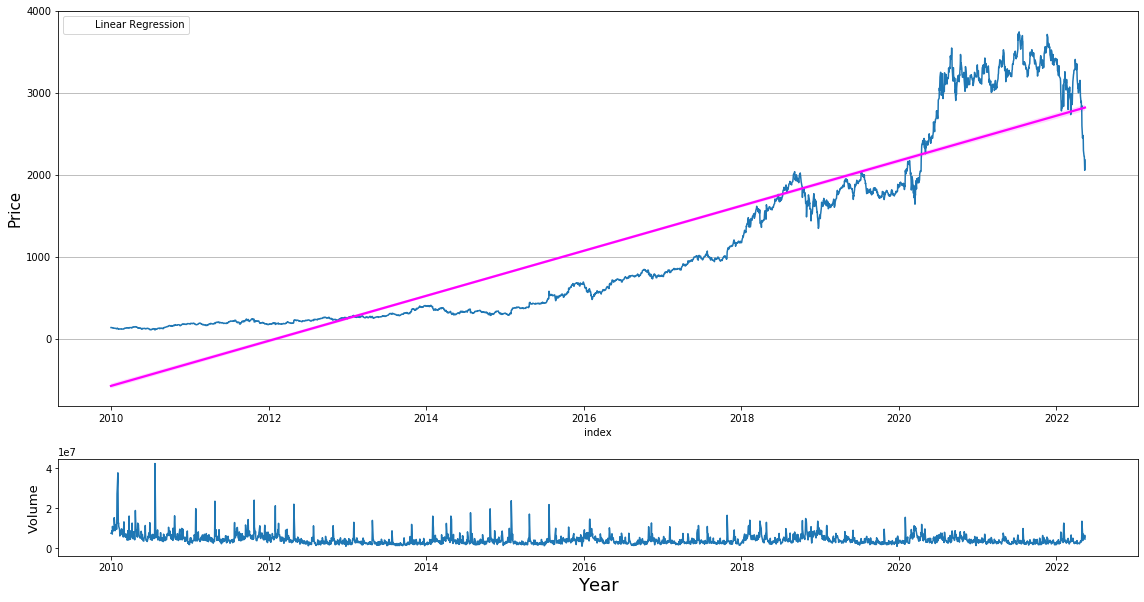

In [22]:
num = int(input('''To check the charts, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
'''))

if num in range(1,6):
    df = pd.DataFrame()
    df['Open'] = tlist[num-1]['Open']
    df.index = [datetime.strptime(x, "%Y-%m-%d") for x in list(tlist[num-1]['Date'])]
    df.index = df.index.map(pd.Timestamp.toordinal)
    data=df.loc[:].reset_index()    
         
    xax = list(tlist[num-1]['Date'])
    yax = list(tlist[num-1]['Open'])
    vol = list(tlist[num-1]['Volume'])
    xs = [datetime.strptime(x, "%Y-%m-%d") for x in xax]
    
    plt.figure(figsize=(16, 10))
    plt.subplot2grid((5, 4), (0, 0), rowspan=3, colspan=4)
    plt.plot(xs, yax)
    sns.regplot(data=data, x='index', y='Open',color='magenta', scatter_kws={"color" : "white"}, label='Linear Regression', scatter=True)
    plt.grid(axis='y')
    plt.ylabel('Price', fontsize=15)
    plt.legend()
    plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
    plt.plot(xs, vol)
    sns.regplot(data=data, x='index', y='Open',color='white', scatter_kws={"color" : "white"}, label='Linear Model', scatter=True)
    plt.ylabel('Volume', fontsize = 13)
    plt.xlabel('Year', fontsize = 18)
    plt.tight_layout()
    plt.show()

else:
    print("Wrong ticker number!")

## To check user shares list:

In [23]:
profit = pd.DataFrame(user.shares.items())

profit.columns = ['Ticker', 'Quantity']
profit['Profit percentage'] = [(latest_price[i] - curr_price[i]) * 100 /  curr_price[i]  for i in user.shares.keys()]
profit['Profit in US$'] = [latest_price[i] - curr_price[i]  for i in user.shares.keys()] 
profit['Value in US$'] = [tp[i] * user.shares[i] for i in user.shares.keys()]
profit = profit[profit['Quantity'] != 0]

print(profit.to_markdown())

|    | Ticker   |   Quantity |   Profit percentage |   Profit in US$ |   Value in US$ |
|---:|:---------|-----------:|--------------------:|----------------:|---------------:|
|  0 | FB       |          2 |           -0.747306 |           -1.45 |         385.16 |
|  1 | AMZN     |          1 |           14.4186   |          274.89 |        2181.38 |


## To check market shares list:

In [25]:
ratio = pd.DataFrame()

sorted_ratio = {}
for i in tickers:
    sorted_ratio[i] = (latest_price[i] * 100 / second_to_latest[i]) - 100 

sorted_ratio = dict(sorted(sorted_ratio.items(), key = lambda x:x[1], reverse = True))

ratio['Ticker'] = sorted_ratio.keys()
ratio['24h change in %'] = sorted_ratio.values()
ratio['Value in US$'] = [tp[i] for i in sorted_ratio.keys()]

print(ratio.to_markdown())

|    | Ticker   |   24h change in % |   Value in US$ |
|---:|:---------|------------------:|---------------:|
|  0 | TSLA     |          10.3395  |         773.48 |
|  1 | AMZN     |           6.14987 |        2181.38 |
|  2 | FB       |           2.95093 |         192.58 |
|  3 | GOOGL    |           2.83315 |        2290.66 |
|  4 | AAPL     |           1.27477 |         144.59 |
